<h1> Trabalhando com documentos PDFS </h1>
Objetivo: criar uma aplicação python que receberá uma lista de documentos PDFs e extrair o texto deles </br>
Entrada: pasta com arquivos PDFs </br>
Saída: dataframe com o campo 'texto', para cada pdf </br>

Instalando os pacotes necessários

In [2]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 52.5 MB/s eta 0:00:00


In [37]:
# Conferindo se foi instalado e a versão instalada
import fitz # PyMuPDF
print(f'Pacote PYMUPDF instalado {fitz.__version__}')

Pacote PYMUPDF instalado 1.25.3


Importação dos Pacotes e Bibliotecas Necessárias

In [38]:
import os
import fitz
import pandas as pd
import matplotlib.pyplot as plt

Definição de Funções

In [39]:
def ler_pdf(caminho_pdf):
  try:
    doc = fitz.open(caminho_pdf)
    texto = ""
    # Ler todas as páginas, uma por uma
    for pagina in doc:
      texto += pagina.get_text()
    # Verifica se tem conteúdo o PDF
    if(texto.strip()):
      return texto
    else:
      return "INVALIDO_NAO_PESQUISAVEL"
  except Exception as excecao:
    print(f"Erro ao ler o PDF: {excecao}")
    return "INVALIDO"
  finally:
        # Garante o fechamento do documento
        if 'doc' in locals():
            doc.close()

Escopo Principal (Main)

In [40]:
# Conexão ao google driver
from google.colab import drive
drive.mount('/content/drive')
print("Conexão ao Google Driver")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Conexão ao Google Driver


In [41]:
# Acessando a pasta onde estão os pdfs, caso esteja em pasta diferente, faça as devidas alterações
caminho_pdfs = '/content/drive/MyDrive/pdf_python_article/pdfs'
lista_arquivos = os.listdir(caminho_pdfs)
print(f"Qtde de arquivos pdfs encontrados: {len(lista_arquivos)}")

Qtde de arquivos pdfs encontrados: 7


In [42]:
#Adicionando o caminho completo para encontrar o PDF
lista_arquivos = [os.path.join(caminho_pdfs,arquivo) for arquivo in lista_arquivos]
print(lista_arquivos)

['/content/drive/MyDrive/pdf_python_article/pdfs/61821.PDF', '/content/drive/MyDrive/pdf_python_article/pdfs/AlgoritmosMachineLearning.pdf', '/content/drive/MyDrive/pdf_python_article/pdfs/Gabriel_Goldstein_CORRIG.pdf', '/content/drive/MyDrive/pdf_python_article/pdfs/liveraro_giannishigerusetoue__m.pdf', '/content/drive/MyDrive/pdf_python_article/pdfs/Gabriel_Ferreira_dos_Santos_Silva.pdf', '/content/drive/MyDrive/pdf_python_article/pdfs/LucasFranciscoAmaralOroscoPellicerCorr20.pdf', '/content/drive/MyDrive/pdf_python_article/pdfs/.ipynb_checkpoints']


In [43]:
# Criando o dataframe final
lista_pdfs = []
# Extraindo o conteúdo de cada PDF
for pdf in lista_arquivos:
  print(f"Extraindo o conteúdo do PDF: {pdf}")
  texto_pdf = ler_pdf(pdf)
  if(not texto_pdf.startswith("INVALIDO")):
    lista_pdfs.append({'artigo':pdf,'texto':texto_pdf})

# Adicionando no dataframe
df_artigos = pd.DataFrame(lista_pdfs)
print(f'Qtde de artigos,linhjas {len(df_artigos)}')
print(df_artigos.head(5))

Extraindo o conteúdo do PDF: /content/drive/MyDrive/pdf_python_article/pdfs/61821.PDF
Extraindo o conteúdo do PDF: /content/drive/MyDrive/pdf_python_article/pdfs/AlgoritmosMachineLearning.pdf
Extraindo o conteúdo do PDF: /content/drive/MyDrive/pdf_python_article/pdfs/Gabriel_Goldstein_CORRIG.pdf
Extraindo o conteúdo do PDF: /content/drive/MyDrive/pdf_python_article/pdfs/liveraro_giannishigerusetoue__m.pdf
Extraindo o conteúdo do PDF: /content/drive/MyDrive/pdf_python_article/pdfs/Gabriel_Ferreira_dos_Santos_Silva.pdf
Extraindo o conteúdo do PDF: /content/drive/MyDrive/pdf_python_article/pdfs/LucasFranciscoAmaralOroscoPellicerCorr20.pdf
Extraindo o conteúdo do PDF: /content/drive/MyDrive/pdf_python_article/pdfs/.ipynb_checkpoints
Erro ao ler o PDF: '/content/drive/MyDrive/pdf_python_article/pdfs/.ipynb_checkpoints' is no file
Qtde de artigos,linhjas 6
                                                                                 artigo  \
0                              /content/drive/

In [44]:
# Visualizando um conteúdo completo de texto para verificar se está correto
linha1 = df_artigos.loc[0,'texto']
print(f"Qtde de palavras: {len(linha1)}")
print(linha1)

Qtde de palavras: 568933
 
 
 
 
 
Camila De Paoli Leporace 
 
 
 
 
 
MACHINE LEARNING E A APRENDIZAGEM HUMANA 
Uma Análise a Partir do Enativismo 
 
 
 
 
 
 
Tese de Doutorado 
 
 
Tese apresentada como requisito parcial para 
obtenção do grau de Doutor pelo Programa de Pós- 
graduação em Educação do Departamento de 
Educação do Centro de Teologia e Ciências 
Humanas da PUC-Rio. 
 
 
    Orientador:         Prof. Ralph Ings Bannell 
 
    Coorientadora: Prof. Maria Teresa     
Ribeiro Pessoa  
 
 
 
 
 
 
 
Rio de Janeiro 
Janeiro de 2023 
PUC-Rio - Certificação Digital Nº 1912594/CA
 
 
 
Camila de Paoli Leporace 
 
 
 
MACHINE LEARNING E A APRENDIZAGEM HUMANA 
Uma Análise a Partir do Enativismo 
 
 
Tese apresentada como requisito parcial para 
obtenção do grau de Doutor pelo Programa de Pós- 
graduação em Educação do Departamento de 
Educação do Centro de Teologia e Ciências 
Humanas da PUC-Rio. Aprovada pela Comissão 
Examinadora abaixo assinada. 
 
 
Prof. Ralph Ings Bannell 
O

In [45]:
# Contar as palavras existentes para cada artigo
# Cada palavra está separado por espaço. Contaremos pontos, palavras, números etc ...
df_artigos['qtde_palavras'] = df_artigos['texto'].apply(lambda x: len(x.split()))
print(df_artigos.head(5))

                                                                                 artigo  \
0                              /content/drive/MyDrive/pdf_python_article/pdfs/61821.PDF   
1          /content/drive/MyDrive/pdf_python_article/pdfs/AlgoritmosMachineLearning.pdf   
2           /content/drive/MyDrive/pdf_python_article/pdfs/Gabriel_Goldstein_CORRIG.pdf   
3    /content/drive/MyDrive/pdf_python_article/pdfs/liveraro_giannishigerusetoue__m.pdf   
4  /content/drive/MyDrive/pdf_python_article/pdfs/Gabriel_Ferreira_dos_Santos_Silva.pdf   

                                                                                                 texto  \
0   \n \n \n \n \nCamila De Paoli Leporace \n \n \n \n \n \nMACHINE LEARNING E A APRENDIZAGEM HUMAN...   
1  ALGORITMOS DE MACHINE LEARNING\nPARA PREVISÃO DE AÇÕES DA B3\nGustavo Carvalho Santos\nUniversid...   
2   \n \nGabriel Nassar Reich Goldstein \n \nIdentificação de genes novos de Drosophila utilizando ...   
3  UNIVERSIDADE ESTADUAL DE C

In [46]:
# Contar a quantidades de palavras total, não necessariamente únicas
qtde_total_palavras = df_artigos['qtde_palavras'].sum()
print(f"Qtde total de palavras: {qtde_total_palavras}")

# Média das palavras por linha
media_palavras = df_artigos['qtde_palavras'].mean()
print(f"Média de palavras por linha: {media_palavras}")

Qtde total de palavras: 216006
Média de palavras por linha: 36001.0


In [47]:
# Estatísticas básicas palavras
df_artigos['qtde_palavras'].describe()

,qtde_palavras
count,6.000000
mean,36001.000000
std,25681.453853
min,14313.000000
25%,25045.000000
50%,28555.500000
75%,32677.250000
max,86656.000000


Text(0, 0.5, 'Qtde de artigos')

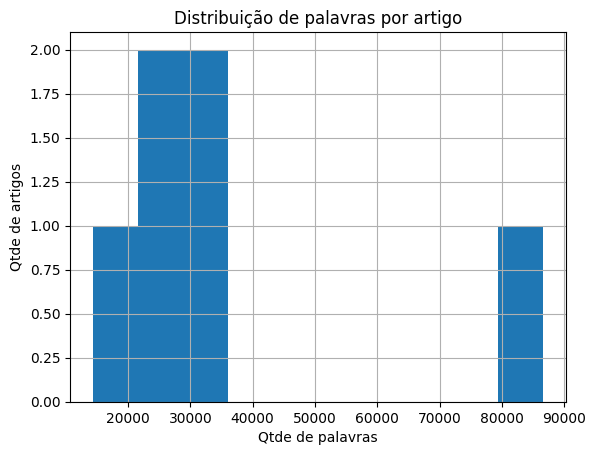

In [49]:
histograma = df_artigos['qtde_palavras'].hist()
plt.title('Distribuição de palavras por artigo')
plt.xlabel('Qtde de palavras')
plt.ylabel('Qtde de artigos')

In [48]:
# Reduzindo a quantidade de caracteres para mostrar resultados
pd.set_option('display.max_colwidth', 100)
# Criando uma coluna chamada endereço completo do artigo
df_artigos['endereco_artigo'] = df_artigos['artigo']
# Reorganizando a coluna artigo apenas com o nome do artigo
df_artigos['artigo'] =  df_artigos['artigo'].str.rsplit('/', n=1).str[-1]
df_artigos.head(5)

,artigo,texto,qtde_palavras,endereco_artigo
0,61821.PDF,\n \n \n \n \nCamila De Paoli Leporace \n \n \n \n \n \nMACHINE LEARNING E A APRENDIZAGEM HUMAN...,86656,/content/drive/MyDrive/pdf_python_article/pdfs/61821.PDF
1,AlgoritmosMachineLearning.pdf,ALGORITMOS DE MACHINE LEARNING\nPARA PREVISÃO DE AÇÕES DA B3\nGustavo Carvalho Santos\nUniversid...,14313,/content/drive/MyDrive/pdf_python_article/pdfs/AlgoritmosMachineLearning.pdf
2,Gabriel_Goldstein_CORRIG.pdf,\n \nGabriel Nassar Reich Goldstein \n \nIdentificação de genes novos de Drosophila utilizando ...,31559,/content/drive/MyDrive/pdf_python_article/pdfs/Gabriel_Goldstein_CORRIG.pdf
3,liveraro_giannishigerusetoue__m.pdf,UNIVERSIDADE ESTADUAL DE CAMPINAS\nInstituto de Física “Gleb Wataghin”\nGianni Shigeru Setoue Li...,33050,/content/drive/MyDrive/pdf_python_article/pdfs/liveraro_giannishigerusetoue__m.pdf
4,Gabriel_Ferreira_dos_Santos_Silva.pdf,Universidade de São Paulo\nEscola Superior de Agricultura “Luiz de Queiroz”\nFraude de cartão de...,24876,/content/drive/MyDrive/pdf_python_article/pdfs/Gabriel_Ferreira_dos_Santos_Silva.pdf


In [50]:
# Salvando o dataframe final
try:
  df_artigos.to_csv('../artigos_pdf.csv',index=False)
except Exception as excecao:
  print(f"Erro ao salvar o arquivo: {excecao}")
else:
  print("Arquivo salvo com sucesso")

Arquivo salvo com sucesso
